In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yfinance as yf

In [4]:
df = yf.download('SBIN',start='2000-01-01')
df.head()

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SBIN']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SBIN,SBIN,SBIN,SBIN,SBIN,SBIN
Date,,,,,,


In [13]:
df.columns = df.columns.str.lower()

In [5]:
df.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume'], dtype='object')

In [6]:
df.drop(['adj close'],axis=1,inplace=True)

In [7]:
df.tail()

,open,high,low,close,volume
Date,,,,,
2024-07-16,24615.900391,24661.250000,24587.650391,24613.000000,283200
2024-07-18,24543.800781,24837.750000,24504.449219,24800.849609,350900
2024-07-19,24853.800781,24854.800781,24508.150391,24530.900391,343800
2024-07-22,24445.750000,24595.199219,24362.300781,24509.250000,324200
2024-07-23,24568.900391,24582.550781,24074.199219,24479.050781,436400


<Axes: xlabel='Date'>

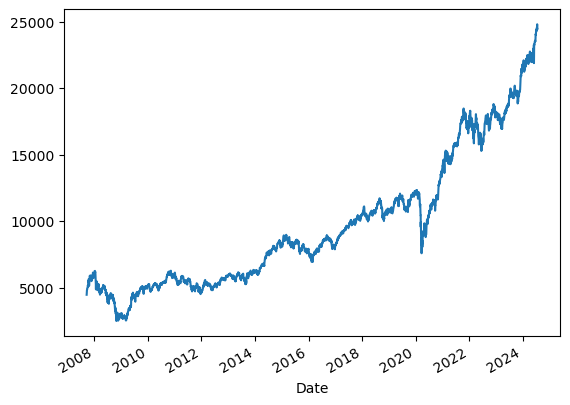

In [8]:
df['close'].plot()

In [9]:
df = df.reset_index()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4128 non-null   datetime64[ns]
 1   open    4128 non-null   float64       
 2   high    4128 non-null   float64       
 3   low     4128 non-null   float64       
 4   close   4128 non-null   float64       
 5   volume  4128 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 193.6 KB


In [14]:
df['year']=df['date'].dt.year

In [15]:
df['month'] = df['date'].dt.month

In [16]:
df['weekday'] = df['date'].dt.day_name()

In [17]:
df.head()

,date,open,high,low,close,volume,year,month,weekday
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0,2007,9,Monday
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0,2007,9,Tuesday
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0,2007,9,Wednesday
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0,2007,9,Thursday
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0,2007,9,Friday


<Axes: xlabel='year'>

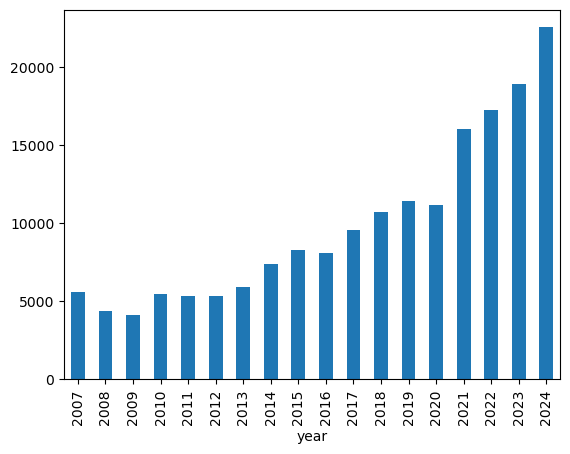

In [18]:
df.groupby('year')['close'].mean().plot(kind='bar')

In [19]:
df.head(5)['close'],df.close.shift(1).head(5)

(0    4494.649902
 1    4546.200195
 2    4732.350098
 3    4747.549805
 4    4837.549805
 Name: close, dtype: float64,
 0            NaN
 1    4494.649902
 2    4546.200195
 3    4732.350098
 4    4747.549805
 Name: close, dtype: float64)

In [20]:
df['prv close'] = df.close.shift(1)

In [21]:
df.head()

,date,open,high,low,close,volume,year,month,weekday,prv close
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0,2007,9,Monday,NaN
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0,2007,9,Tuesday,4494.649902
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0,2007,9,Wednesday,4546.200195
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0,2007,9,Thursday,4732.350098
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0,2007,9,Friday,4747.549805


In [22]:
df['change'] = round(((df['close']-df['prv close'])/df['prv close'])*100,2)

In [23]:
df.sample(10)

,date,open,high,low,close,volume,year,month,weekday,prv close,change
3285,2021-02-19,15074.799805,15144.049805,14898.200195,14981.750000,712200,2021,2,Friday,15118.950195,-0.91
2577,2018-04-05,10228.450195,10331.799805,10227.450195,10325.150391,236800,2018,4,Thursday,10128.400391,1.94
294,2008-11-26,2652.449951,2762.600098,2643.350098,2752.250000,0,2008,11,Wednesday,2654.000000,3.70
2658,2018-07-30,11296.650391,11328.099609,11261.450195,11319.549805,278800,2018,7,Monday,11278.349609,0.37
1452,2013-08-23,5428.750000,5478.799805,5377.799805,5471.750000,251500,2013,8,Friday,5408.450195,1.17
915,2011-06-09,5523.549805,5540.100098,5502.049805,5521.049805,0,2011,6,Thursday,5526.850098,-0.10
116,2008-03-03,5222.799805,5222.799805,4936.049805,4953.000000,0,2008,3,Monday,5223.500000,-5.18
816,2011-01-13,5850.750000,5857.750000,5736.700195,5751.899902,0,2011,1,Thursday,5863.250000,-1.90
2797,2019-02-25,10813.250000,10887.099609,10788.049805,10880.099609,385900,2019,2,Monday,10791.650391,0.82
2970,2019-11-18,11915.150391,11946.200195,11867.599609,11884.500000,514400,2019,11,Monday,11895.450195,-0.09


<Axes: xlabel='change', ylabel='Count'>

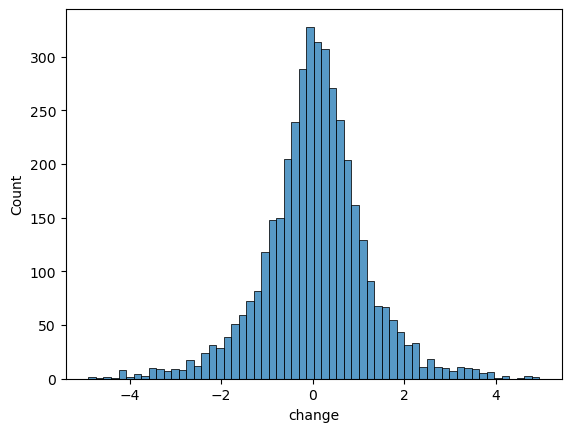

In [24]:
sns.histplot(data=df.loc[(df.change<5)&(df.change>-5) ],x='change',bins=60)

In [25]:
df.groupby('weekday')['change'].mean().sort_values()

weekday
Thursday    -0.015055
Monday       0.009357
Friday       0.075885
Tuesday      0.076723
Wednesday    0.103106
Name: change, dtype: float64

In [26]:
df.head()

,date,open,high,low,close,volume,year,month,weekday,prv close,change
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0,2007,9,Monday,NaN,NaN
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0,2007,9,Tuesday,4494.649902,1.15
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0,2007,9,Wednesday,4546.200195,4.09
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0,2007,9,Thursday,4732.350098,0.32
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0,2007,9,Friday,4747.549805,1.90


In [27]:
df['range'] = (df['high']-df['low'])/df['low']*100

<Axes: xlabel='range', ylabel='Count'>

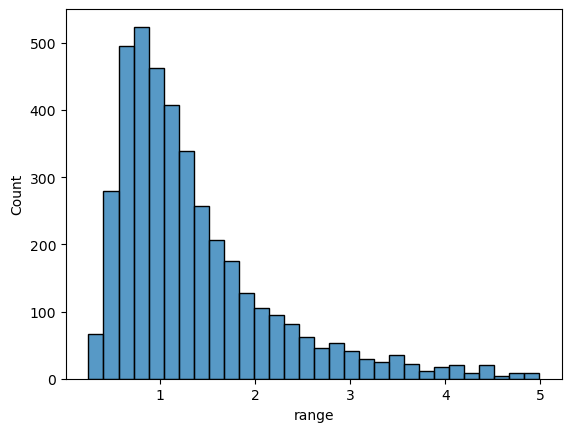

In [28]:
sns.histplot(data = df.loc[df['range']<5],x='range',bins=30)

In [29]:
df['jc']=abs(df['change'])

In [30]:
df.groupby('weekday')['jc'].mean()

weekday
Friday       0.933010
Monday       1.015473
Thursday     0.840315
Tuesday      0.821855
Wednesday    0.831451
Name: jc, dtype: float64

In [31]:
df.jc.mean()

0.8880663920523383

In [32]:
df.head()

,date,open,high,low,close,volume,year,month,weekday,prv close,change,range,jc
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0,2007,9,Monday,NaN,NaN,1.476733,NaN
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0,2007,9,Tuesday,4494.649902,1.15,1.567538,1.15
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0,2007,9,Wednesday,4546.200195,4.09,4.148124,4.09
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0,2007,9,Thursday,4732.350098,0.32,0.840901,0.32
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0,2007,9,Friday,4747.549805,1.90,2.577265,1.90


In [33]:
df['night'] = df.close - df.open

<Axes: xlabel='night', ylabel='Count'>

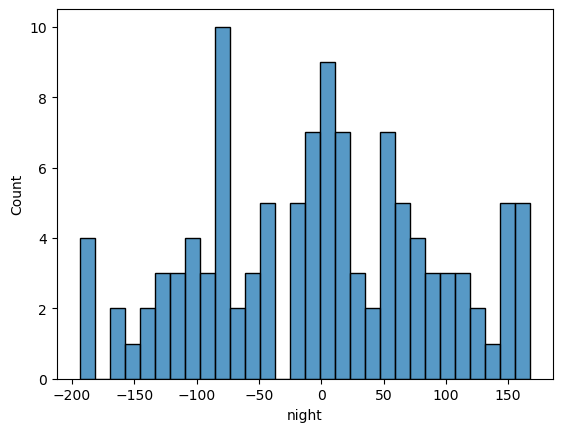

In [34]:
rangee = 200
year = 2024
sns.histplot(data=df.loc[
    (df['night']>-rangee) & 
    (df['night']<rangee) &
    (df['year']==year)]
             ,x='night',bins=30)

I found that most of the time the nifty opens on the range of -100 to +100 69% of time.

In [35]:
df.head(2).T

,0,1
date,2007-09-17 00:00:00,2007-09-18 00:00:00
open,4518.450195,4494.100098
high,4549.049805,4551.799805
low,4482.850098,4481.549805
close,4494.649902,4546.200195
volume,0,0
year,2007,2007
month,9,9
weekday,Monday,Tuesday
prv close,NaN,4494.649902


In [36]:
df['one'] = 1

In [46]:
movement = 1.4
(df.loc[(df['change']>-movement)&(df['change']<=movement)]['one'].sum()/df.shape[0])*100

81.3953488372093